<h1 style='background:#4682B4; border:0; border-radius: 10px; color:black'><center> 
Hyperledger blockchain enabled secure medical record management
with deep learning-based diagnosis model </center></h1>

# Block Diagram of the Project Model
<img src='project_model.png' width="1500" height="1000" align='middle'>

<h1 style="font-size:60px">Patient Treatment Classification</h1>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#4682B4; border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. Context**](#title-one)
### [**2. About Data**](#title-two)
### [**3. Objective**](#title-three)
### [**4. Import Modules**](#title-four) 
### [**5. Load and Split data**](#title-five)
### [**6. EDA**](#title-six)
### [**7. Feature engineering**](#title-seven)
### [**8. Feature selection**](#title-eight)
### [**9. Maching learning Models**](#title-nine)
### [**10. Deep learning Models**](#title-nine)

# 1. Context
In hospitals, `medical treatments and surgeries` can be categorized into inpatient and outpatient procedures.<br> For patients, it is important to understand the difference between these two types of care, because they impact the length of a patient’s stay in a medical facility and the cost of a procedure.

<b>Inpatient Care (Incare Patient) and Outpatient Care (Outcare Patient)</b>

The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.

Inpatient care requires `overnight hospitalization`. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the `supervision of a nurse or doctor`.

Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised.<br>
<i>[source of information: pbmhealth]

## Problem Statement
In today’s world of `automation, the skills and knowledge` of a person could be utilized at the `best places` possible by automating tasks wherever possible. As a part of the `hospital automation system`, one can build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.

# 2. About Data
The dataset contains Electronic Health Record predictions collected from a private Hospital in Indonesia. It contains the patient's laboratory test results used to determine the next patient's treatment whether <b>in care</b> or <b>out care.</b>

### Attribute information
- HAEMATOCRIT : Patient laboratory test result of haematocrit
- HAEMOGLOBINS : Patient laboratory test result of haemoglobins
- ERYTHROCYTE : Patient laboratory test result of erythrocyte
- LEUCOCYTE : Patient laboratory test result of leucocyte
- THROMBOCYTE : Patient laboratory test result of thrombocyte
- MCH : Patient laboratory test result of MCH
- MCHC : Patient laboratory test result of MCHC
- MCV : Patient laboratory test result of MCV
- AGE : Patient age
- SEX : Patient gender
- SOURCE : Target ( Binary :in/out )

#### Acknowledgements
This dataset was originally downloaded from Mendeley Data.
Sadikin, Mujiono (2020), “EHR Dataset for Patient Treatment Classification”, Mendeley Data, V1, <a href= 'https://data.mendeley.com/datasets/7kv3rctx7m/1'>dataset</a> <br>


# 3. Objective:
- Build a machine or deep learning model to predict if the patient should be classified as <b>in care</b> or <b>out care</b> based on the patient's laboratory test result.


## Solution
- It is a Supervised Learning Problem
- Binary Classification task (0 or 1)
- Performance metrics
    <!-- - Precision
    - Recall
    - Accuracy -->

# 4. Import modules

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# for Machine learning
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

import pickle

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

# for styling
plt.style.use('seaborn-whitegrid')

# 5. Load and split data

In [2]:

# Load dataset into the memory

data = pd.read_csv('data-ori.csv')
data.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out


Let's divide the data into train and test sets with stratify.<br>
Train : 80% of data<br>
Test : 20% of data

In [3]:

# Label encoding
# (1=in care patient), (0=out care patient)
data['SOURCE'] = data.SOURCE.replace({"in":1, 'out':0})


# get all the features
features = [feat for feat in data.columns if feat !='SOURCE']

X = data[features] # feature set
y = data['SOURCE'] # target

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test datasets dimensions
print("X_train Shape:", X_train.shape, "\nX_test Shape:", X_test.shape)

X_train Shape: (3529, 10) 
X_test Shape: (883, 10)


# 6. Exploratory data analysis

### Dataset Overview

In [4]:

print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")

The dataset contains 4412 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



### Missing values

In [5]:
# Show the percentage of missing values in each feature
data.isna().mean().to_frame(name='Missing %')

,Missing %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


Observation : Luckily, we didn't find any missing values.

### Unique values

In [6]:
# Count number unique values in each feature
data.nunique().to_frame(name='# of unique values')

,# of unique values
HAEMATOCRIT,326
HAEMOGLOBINS,128
ERYTHROCYTE,433
LEUCOCYTE,276
THROMBOCYTE,554
MCH,189
MCHC,105
MCV,406
AGE,95
SEX,2


## 6.1 Univariate analysis 
Exploring each feature individually


### 6.1.1 Target 
Name : SOURCE<br>
There are two classes in the target
- 0 : Outcare patient
- 1 : Incare patient

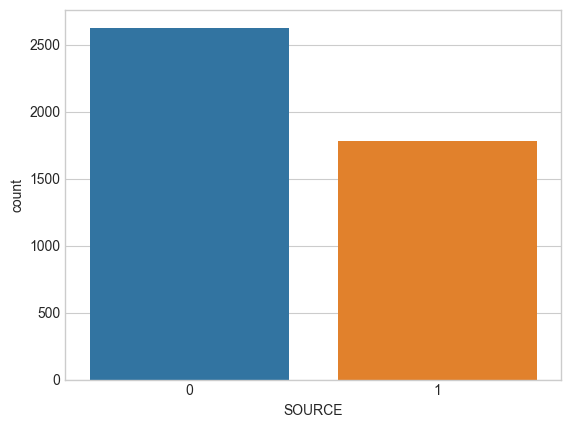

In [7]:
# Target distribution

# plt.figure(figsize=(6,4))
# fig = sns.histplot(x='SOURCE', data=data)
fig= sns.countplot(x='SOURCE', data=data)

In [8]:
# Check no. of data points for each class

data.SOURCE.value_counts().to_frame(name='Count')

,Count
0,2628
1,1784


Observation : 
- data points belongs to class 0 : 2628
- data points belongs to class 1 : 1784
- Quiet imbalance but not a proper imbalanced dataset

### 6.1.2 Numerical features
Names :
- HAEMATOCRIT
- HAEMOGLOBINS
- ERYTHROCYTE
- LEUCOCYTE
- THROMBOCYTE
- MCH
- MCHC
- MCV
- AGE

In [9]:
# Describe statistics for each numerical features

data[num_features].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


#### Box plot

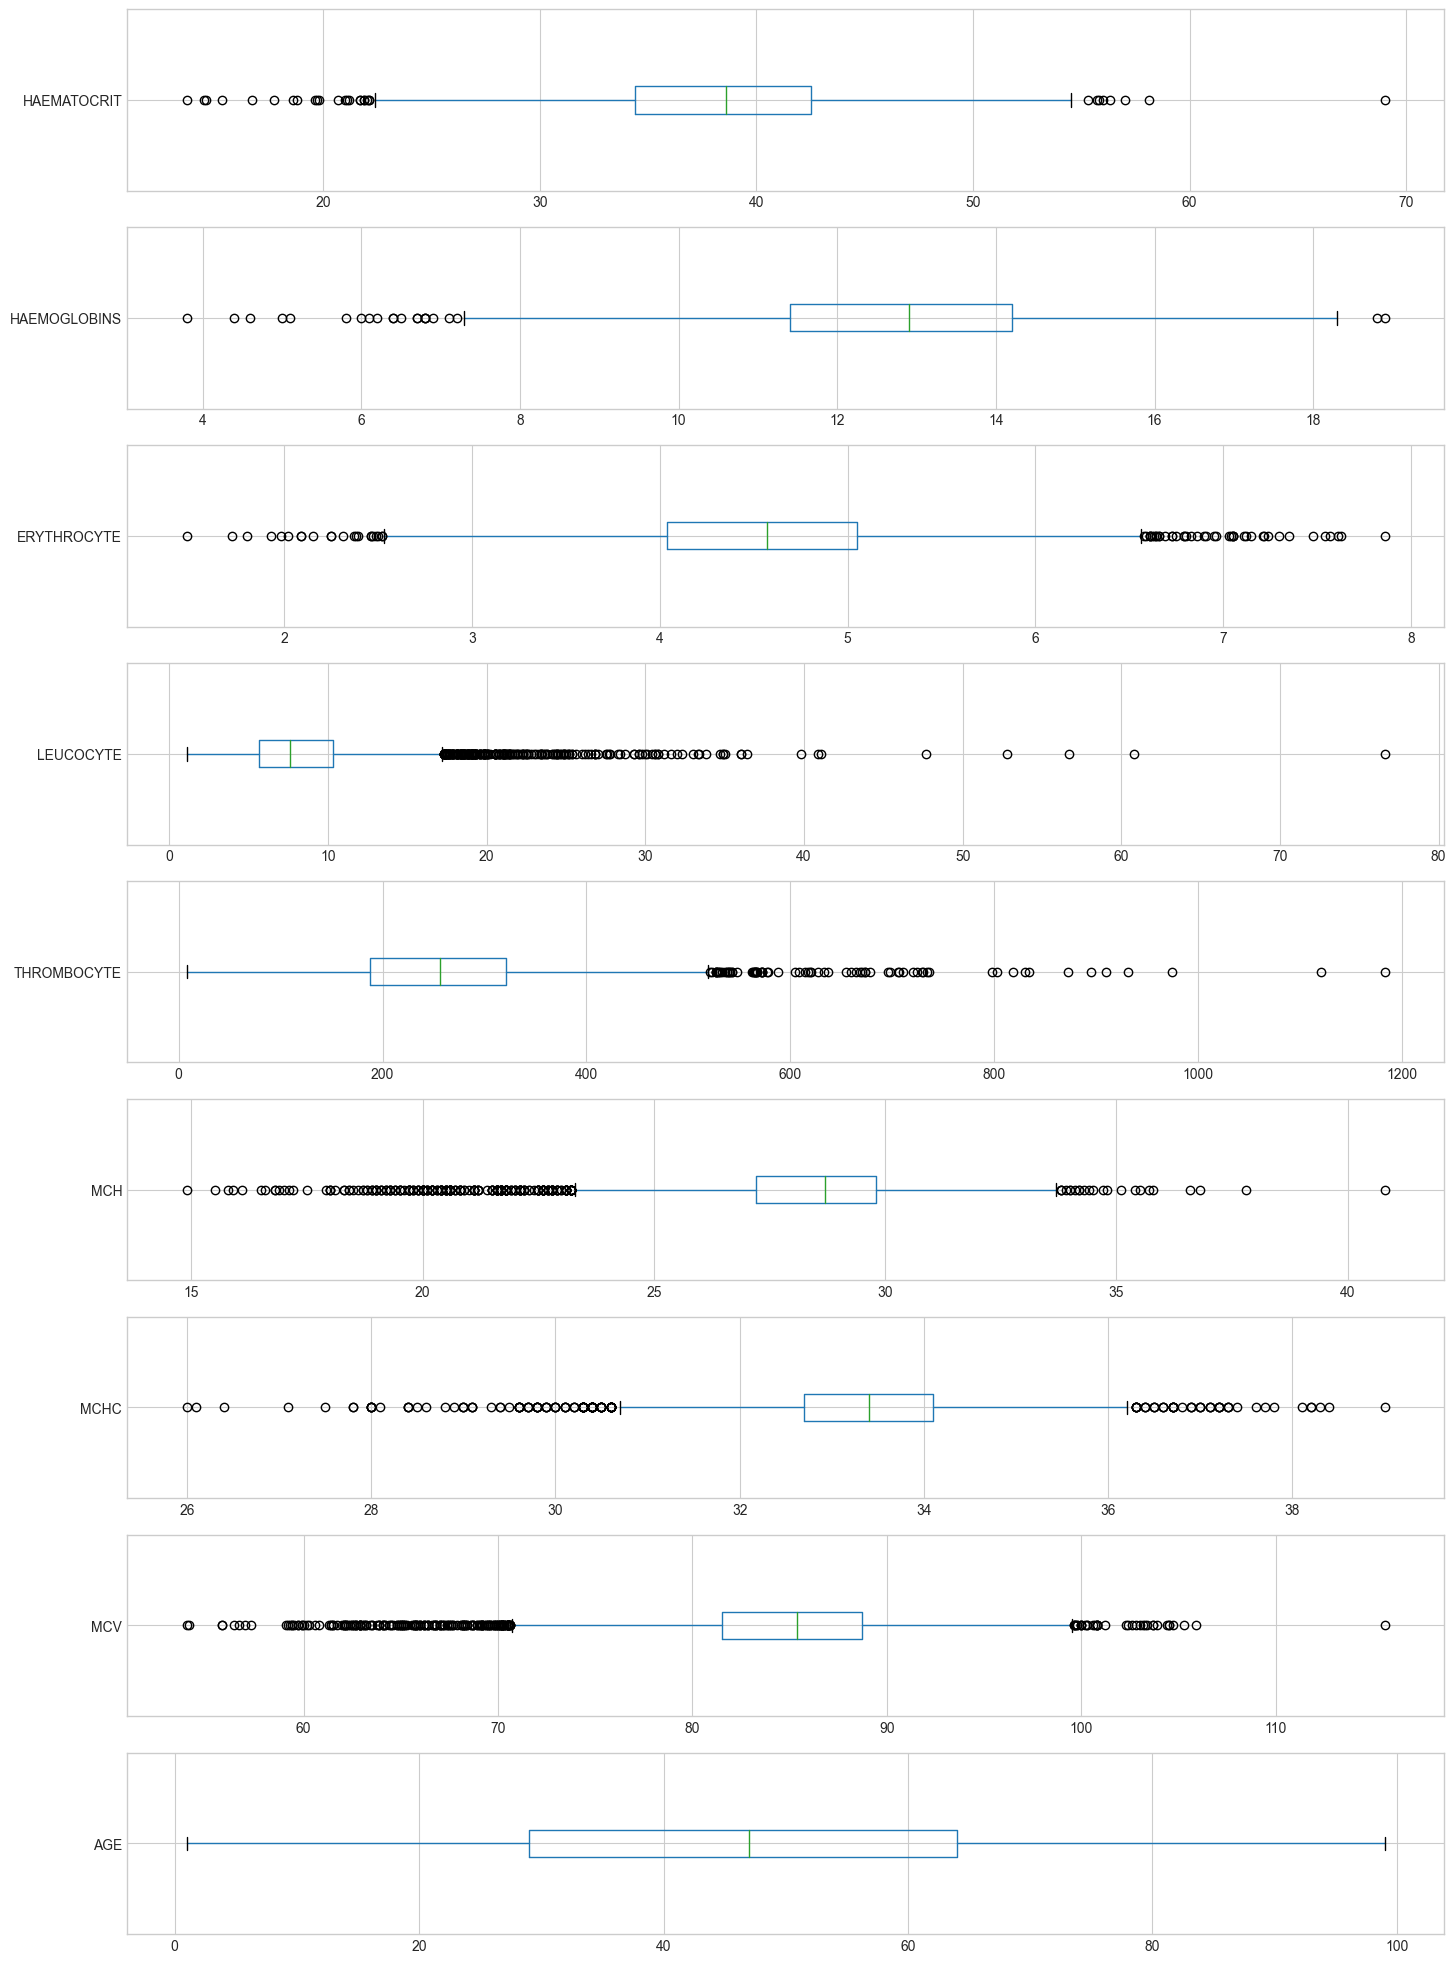

In [11]:
# Boxplot for each numerical feature

fig, axes = plt.subplots(9, 1, figsize=(17, 25))
for i, c in enumerate(num_features):
    f = data[[c]].boxplot(ax=axes[i], vert=False)

##### Density plot

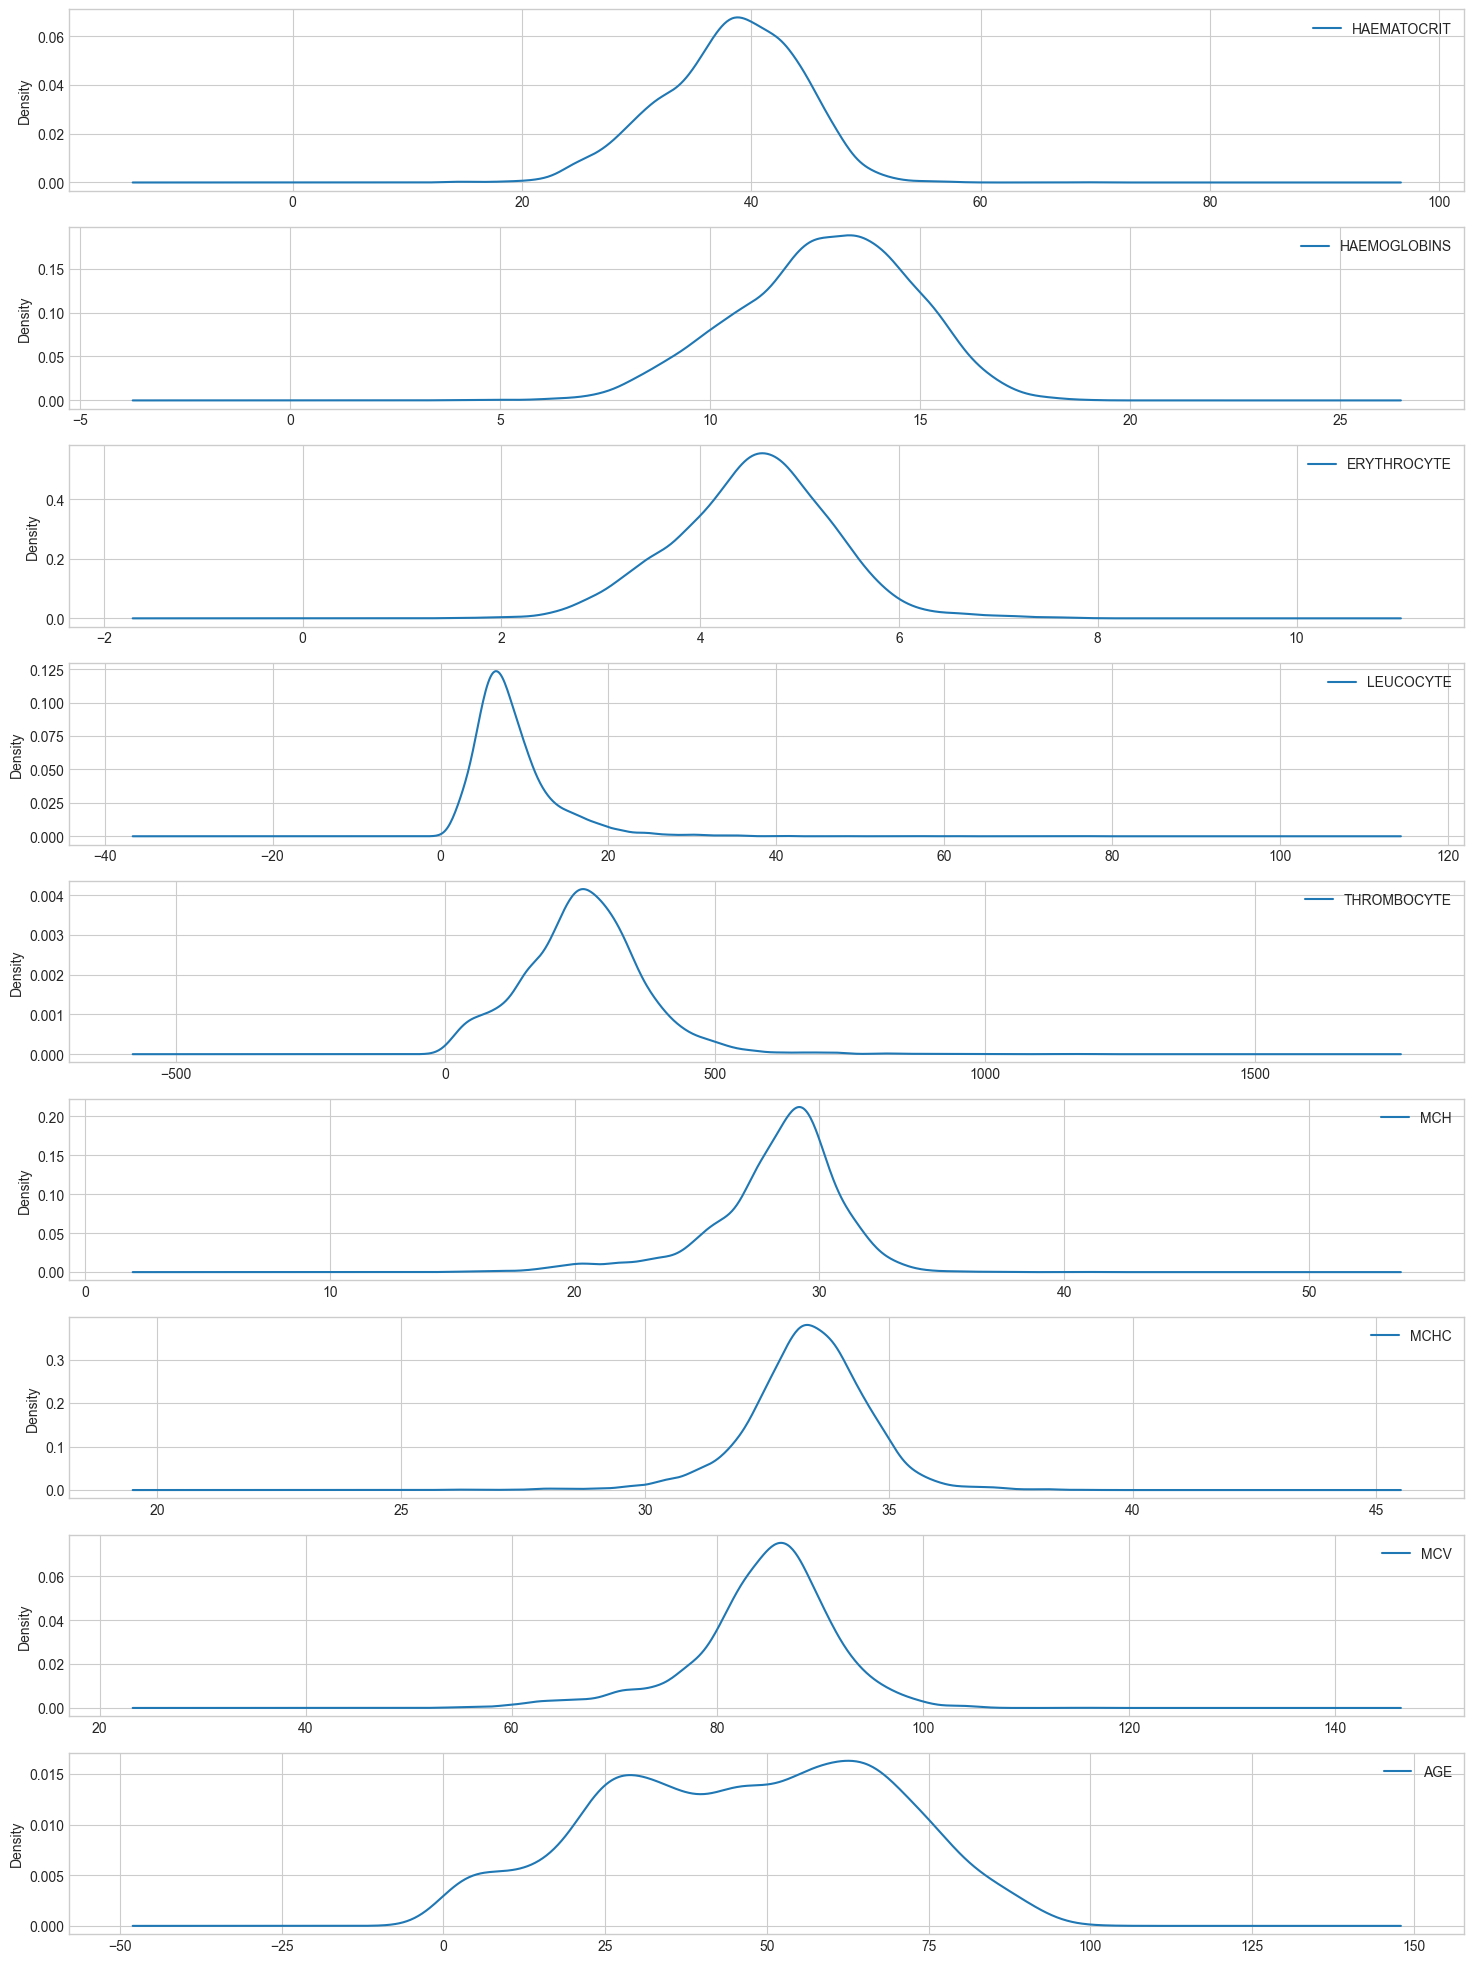

In [ ]:
# Kernel Density Estimation plot for each numerical feature

fig, axes = plt.subplots(9, 1, figsize=(18, 25))
for i, c in enumerate(num_features):
    f = data[[c]].plot(kind='kde',ax=axes[i])

Observations:
- Few outliers are present in some numerical features
- Most of the features follows the Gaussian distribution (approx.)

### 6.1.3 Categorical feature(s)
Name : SEX<br>
Labels : F, M

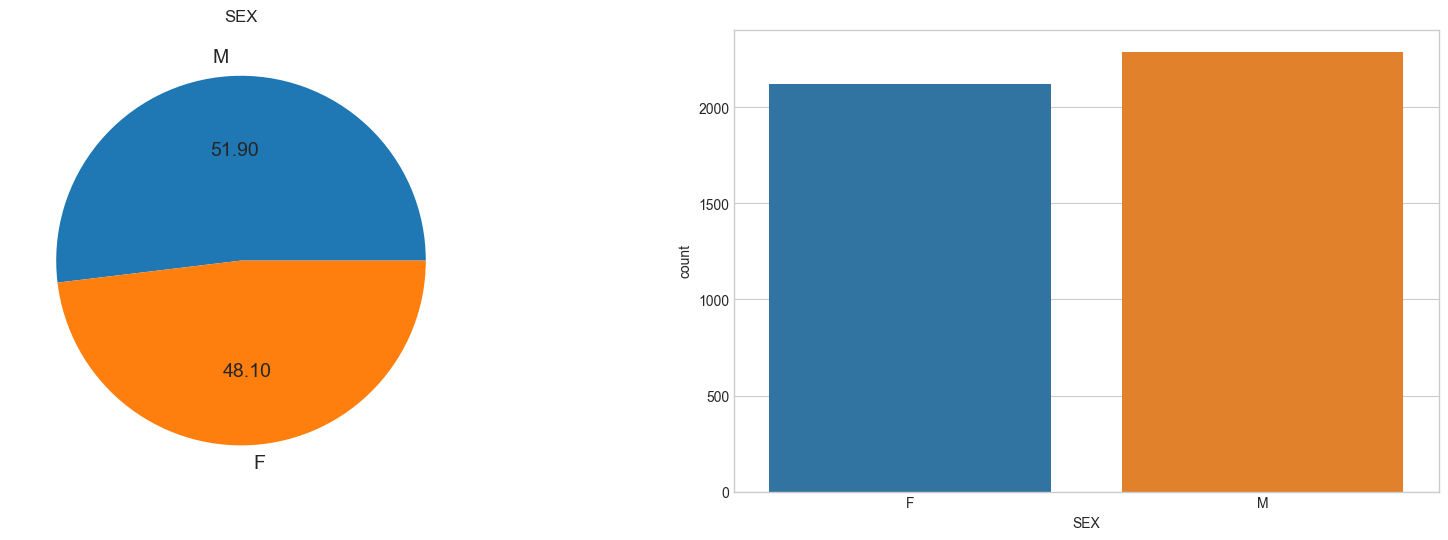

In [ ]:
# Bar and count plot for Categorical feature
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
df = data['SEX'].value_counts()
barplot = df.plot(kind='pie', ax=axes[0], title='SEX', autopct="%.2f", fontsize=14, ylabel='')
countplot = sns.countplot(x='SEX', data=data, ax=axes[1])

## 6.2 Bivariate analysis

### 6.2.1 Numerical features

#### KDE plot

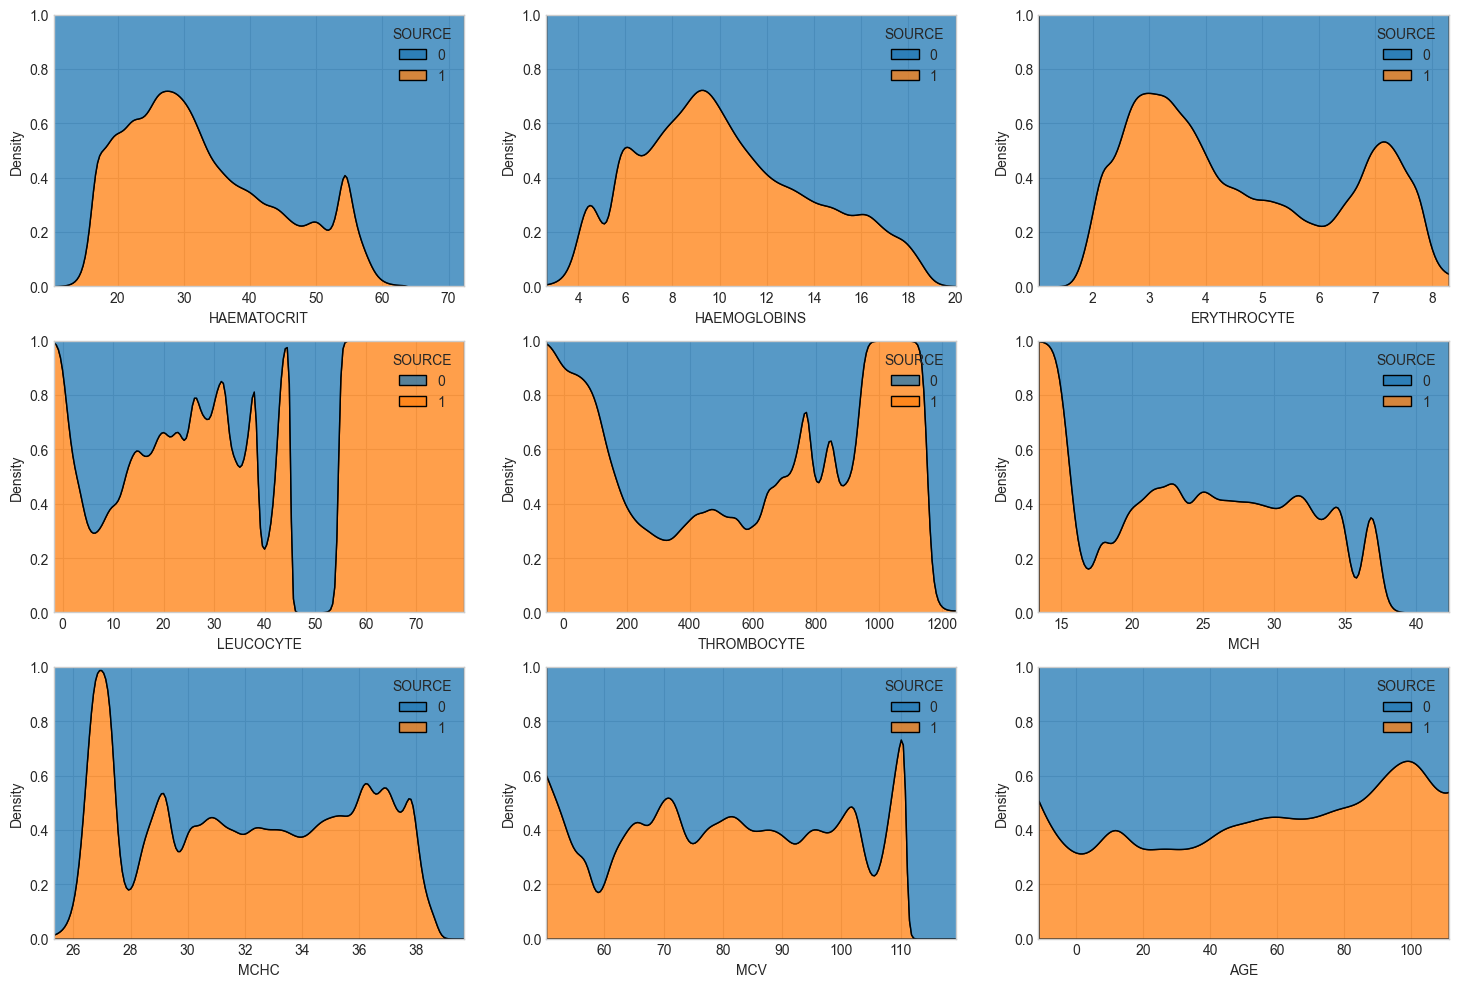

In [ ]:
# KDEplot for each numerical feature w.r.t target
fig, axes = plt.subplots(3,3, figsize=(18,12))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    plot = sns.kdeplot(data=data, x=c, hue='SOURCE', multiple='fill', ax=axes[i])

#### Bar plot

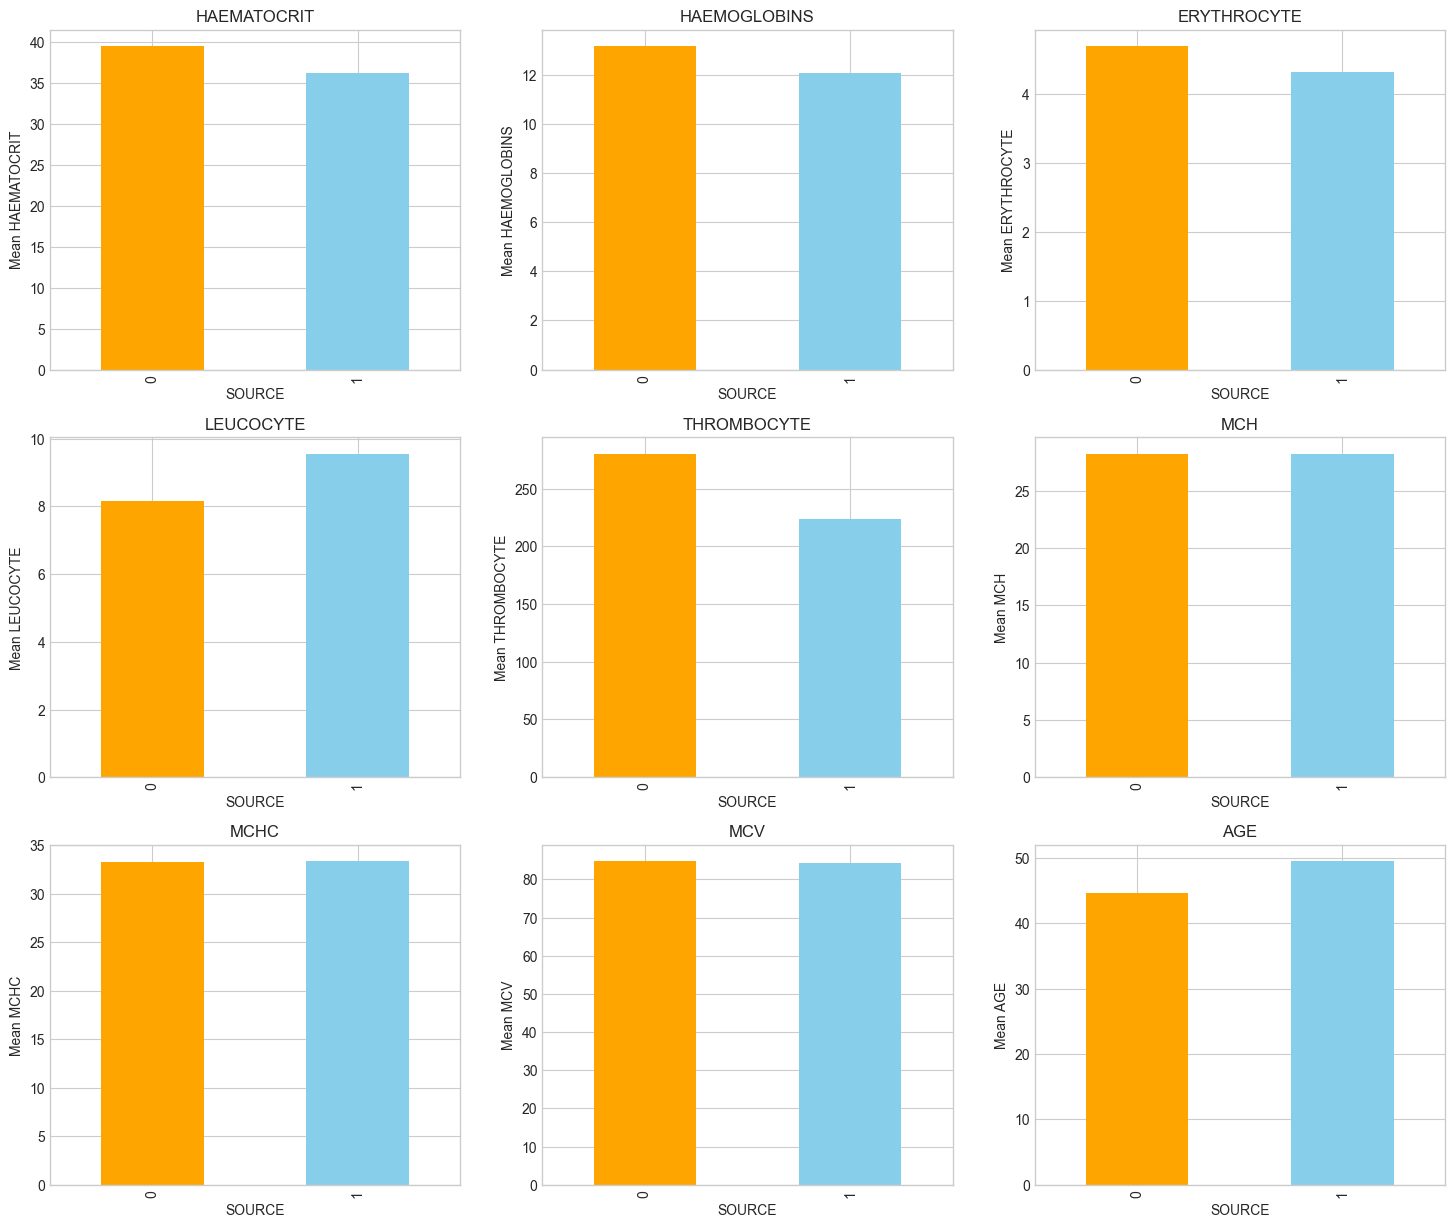

In [ ]:
# Relationship between target and mean of each numerical features
fig, axes = plt.subplots(3,3, figsize=(18,15))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    df = data.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}', color=('orange','skyblue'))

Observations:
- On average, The quantity of HAEMOTOCRIT, HAEMOGLOBINS, ERYTHROCYTE, and THROMBOCYTE features are lesser in In care patients.
- MCH, MCHC, MCV are less informative to differentiate classes
- The mean AGE and LEUCOCYTE of Incare patients is greater than the Outcare patients.

#### Correlation - matrix

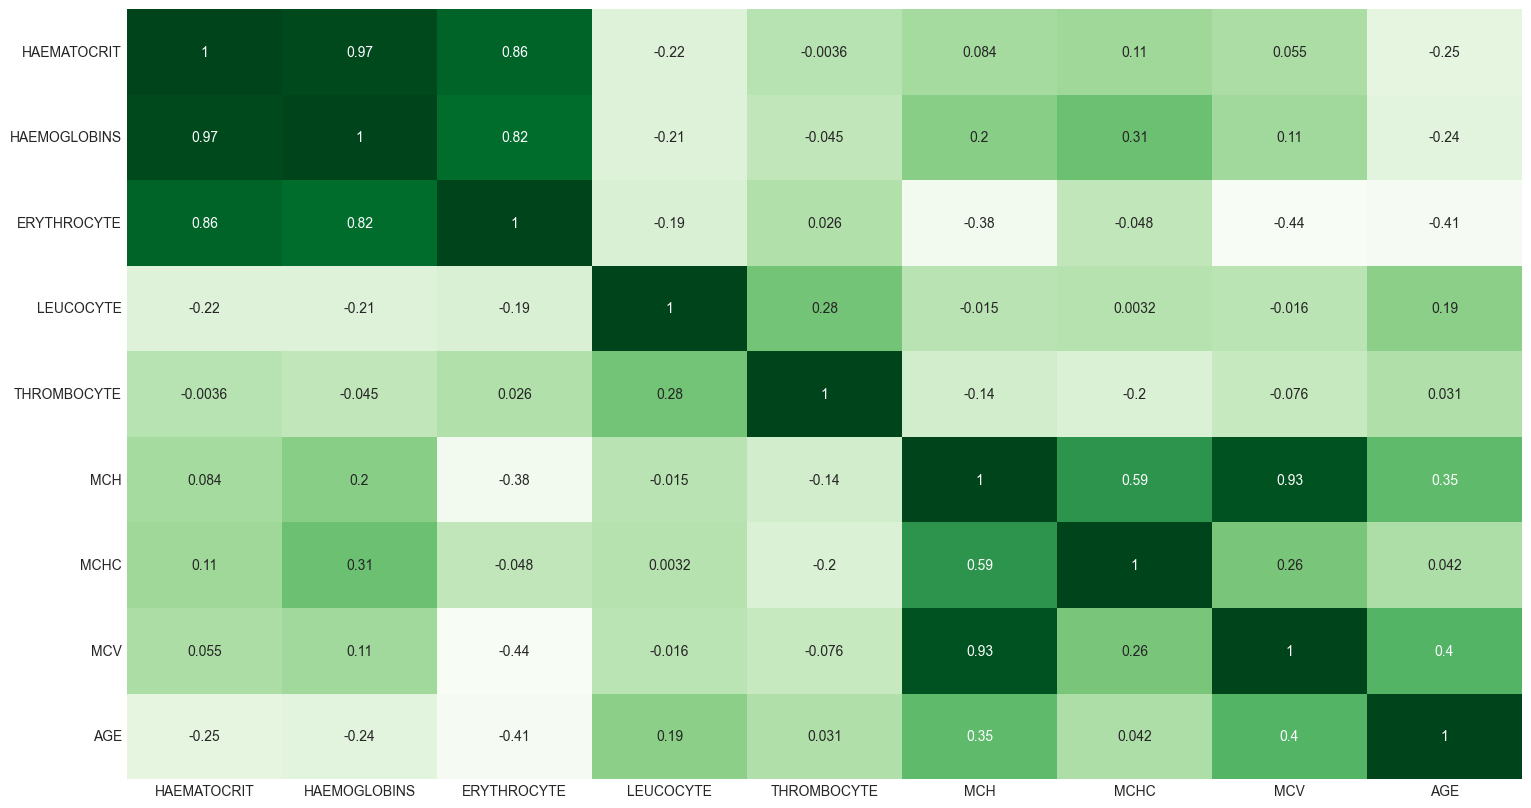

In [ ]:
# Pearson Correlation of features w.r.t each other
corr_matt = data[num_features].corr(method='pearson')
plt.figure(figsize=(18,10))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

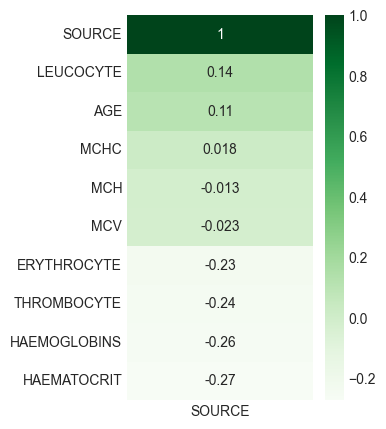

In [ ]:
# Pearson's Correlation of features w.r.t target
corr_matt = data.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=True)

Observations:
- LEUCOCYTE and AGE are postively correlated with target
- THROMBOCYTE, ERYTHROCYTE, HAEMOGLOBINS and HAEMATOCRIT are negatively correlated with target
- No notable correlation found between MCHC, MCH, MCV with target

### 6.2.2 Categorical feature(s)

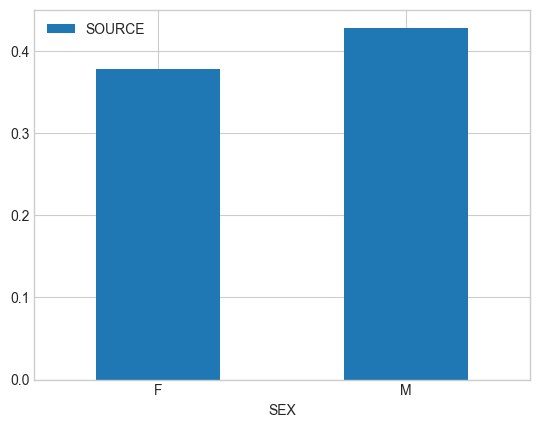

In [ ]:
# Mean of target==1 w.r.t SEX
df = data.groupby('SEX')['SOURCE'].mean().to_frame().reset_index()
plot = df.plot(kind='bar', x='SEX', y='SOURCE')#, color=('orange', 'skyblue'))
plt.xticks(rotation=0)
plt.show()

Observation:
- Male Incare patients are more in number than Female Incare patients

# 7. Feature Engineering

### Label encoding

In [ ]:
# Replace labels of SEX with binary numbers
X_train.SEX.replace({'F':0, 'M':1}, inplace=True)
X_test.SEX.replace({'F':0, 'M':1}, inplace=True)

### Feature Scaling

Transform all the numerical features into a range [0, 1]

In [ ]:
# MinMaxScaler will scale the features to a range of [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[num_features] = scaler.fit_transform(X_train[num_features]) #fit and transform the train set
X_test[num_features] = scaler.transform(X_test[num_features]) #transform the test test

In [ ]:
# preprocessed data
X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2902,0.594595,0.675497,0.504702,0.052980,0.139574,0.575290,0.684615,0.508117,0.591837,1
1282,0.373874,0.403974,0.330721,0.213245,0.233191,0.490347,0.515385,0.493506,0.316327,0
2571,0.295045,0.337748,0.329154,0.075497,0.001702,0.386100,0.553846,0.339286,0.540816,0


# 8. Feature selection
In exploratory data analysis, we found out that the features MCH, MCHC and MCV are not very useful in predicting the target. Let's remove those features.

In [ ]:
# Remove least correlated features [MCH, MCHC, MCV]

X_train.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
X_test.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

# final train set
X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,AGE,SEX
2902,0.594595,0.675497,0.504702,0.052980,0.139574,0.591837,1
1282,0.373874,0.403974,0.330721,0.213245,0.233191,0.316327,0
2571,0.295045,0.337748,0.329154,0.075497,0.001702,0.540816,0


# 9. Machine Learning

### 9.1 Decision Tree Classifier

In [ ]:
# Accuracy
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, tree.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, tree.predict(X_test)))

Train accuracy :  1.0
Test accuracy :  0.681766704416761


#### Hyperparameter tuning of Decision tree classifier

Parameter Distributions:
- 'max_depth': [4, 6, 8, 10, 12, 14, 16],
- 'criterion': ['gini', 'entropy'],
- 'min_samples_split': [2, 10, 20, 30, 40],
- 'max_features': [0.2, 0.4, 0.6, 0.8, 1],
- 'max_leaf_nodes': [8, 16, 32, 64, 128, 256],
- 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]

In [ ]:
# Hyperparameters
distribution = {'max_depth': [4, 6, 8, 10, 12, 14, 16],
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [2, 10, 20, 30, 40],
                'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                'max_leaf_nodes': [8, 16, 32, 64, 128, 256],
                'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
               }

# Random search for best hyperparameters
search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1),
                         distribution,
                         scoring='accuracy',
                         cv=5,
                         verbose=1,
                         random_state=1,
                         n_iter=50)

search.fit(X_train, y_train)

# Best parameters for DT classifier
search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'min_samples_split': 10,
 'max_leaf_nodes': 64,
 'max_features': 0.8,
 'max_depth': 6,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 2}}

In [ ]:
# Retrain with best model

best_tree = search.best_estimator_ #

# best_tree.fit(X_train, y_train)
# print(" Best train accuracy : ", accuracy_score(y_train, search.predict(X_train)))
# print(" Best test accuracy : ", accuracy_score(y_test, search.predict(X_test)))

print(" Best train accuracy : ",search.score(X_train,y_train))
print(" Best test accuracy : ",search.score(X_test,y_test))
# Best train accuracy :  0.7169169736469255 with 30 iter
#  Best test accuracy :  0.6783691959229898

 Best train accuracy :  0.7387361858883537
 Best test accuracy :  0.6987542468856173


In [ ]:
# classification Report
print(classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.67      0.73       526
           1       0.60      0.74      0.66       357

    accuracy                           0.70       883
   macro avg       0.70      0.70      0.70       883
weighted avg       0.72      0.70      0.70       883



### 9.2 Logistic regression

In [ ]:
# Accuracy
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, logreg.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, logreg.predict(X_test)))

Train accuracy :  0.7163502408614338
Test accuracy :  0.7089467723669309


#### Hyperparameter tuning for Logistic regression
Parameter Distributions:
- 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
- 'penalty':['l1', 'l2', 'elasticnet', 'none'],
- 'fit_intercept':[True, False],
- 'max_iter':[100, 200, 300],
- 'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 5}]

In [ ]:
# Hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'fit_intercept':[True, False],
              'max_iter':[100, 200, 300],
              'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 5}]
             }

# Random search for best hyperparameters
search = RandomizedSearchCV(LogisticRegression(random_state=1),
                         param_grid,
                         scoring='accuracy',
                         cv=5,
                         verbose=1,
                         random_state=1,
                         n_iter=50)

search.fit(X_train, y_train)

# Best parameters for Logistic regression classifier
search.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'penalty': 'none',
 'max_iter': 300,
 'fit_intercept': True,
 'class_weight': {0: 1, 1: 1},
 'C': 0.01}

In [ ]:
# Retrain with best model

best_logreg = search.best_estimator_

best_logreg.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_logreg.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_logreg.predict(X_test)))

Best train accuracy :  0.7285349957495041
Best test accuracy :  0.7032842582106456


In [ ]:
# classification Report
print(classification_report(y_test, best_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       526
           1       0.69      0.49      0.57       357

    accuracy                           0.70       883
   macro avg       0.70      0.67      0.67       883
weighted avg       0.70      0.70      0.69       883



### 9.3 Support Vector Classifier

In [ ]:
# Accuracy
svc = SVC(random_state=1)

svc.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, svc.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, svc.predict(X_test)))

Train accuracy :  0.7557381694531029
Test accuracy :  0.7180067950169875


#### Hyperparameter tuning - Support vector classifier
Parameter Distributions:
- 'C': [0.1, 1, 10, 100, 1000], 
- 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
- 'kernel': ['linear', 'rbf', 'poly'],
- 'degree':[0, 1, 2, 3, 4, 5, 6]

In [ ]:
# Hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree':[0, 1, 2, 3, 4, 5, 6]
             } 

# Random search for best hyperparameters
search = RandomizedSearchCV(SVC(random_state=1),
                         param_grid,
                         scoring='accuracy',
                         cv=5,
                         verbose=1,
                         random_state=1,
                         n_iter=30)

search.fit(X_train, y_train)

# Best parameters for Support vector classifier
search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'kernel': 'rbf', 'gamma': 1, 'degree': 4, 'C': 100}

In [ ]:
# Retrain with best model

best_svc = search.best_estimator_

best_svc.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_svc.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_svc.predict(X_test)))

Best train accuracy :  0.768206290733919
Best test accuracy :  0.7338618346545867


In [ ]:
# Classification Eeport
print(classification_report(y_test, best_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       526
           1       0.72      0.56      0.63       357

    accuracy                           0.73       883
   macro avg       0.73      0.71      0.71       883
weighted avg       0.73      0.73      0.73       883



### 9.4 Random forest classifer

In [ ]:
# Accuracy
forest = RandomForestClassifier(random_state=1)

forest.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, forest.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, forest.predict(X_test)))

Train accuracy :  1.0
Test accuracy :  0.7406568516421291


#### Hyperparameter tuning - Random forest classifier
Parameter Distributions:
- 'bootstrap': [True, False],
- 'max_depth': [2, 5, 10, 20, None],
- 'max_features': ['auto', 'sqrt'],
- 'min_samples_leaf': [1, 2, 4],
- 'min_samples_split': [2, 5, 10],
- 'n_estimators': [50, 100, 150, 200]

In [ ]:
# Hyperparameters
params_grid = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [50, 100, 150, 200]}

# Random search for best hyperparameters
search = RandomizedSearchCV(RandomForestClassifier(random_state=1),
                         params_grid,
                         scoring='accuracy',
                         cv=5,
                         verbose=1,
                         random_state=1,
                         n_iter=30)

search.fit(X_train, y_train)

# Best parameters for Random forest classifier
search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [ ]:
# Retrain with best model

best_forest = search.best_estimator_

best_forest.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_forest.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_forest.predict(X_test)))

Best train accuracy :  0.925758005100595
Best test accuracy :  0.7417893544733862


In [ ]:
# Classification Report
print(classification_report(y_test, best_forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       526
           1       0.71      0.61      0.65       357

    accuracy                           0.74       883
   macro avg       0.73      0.72      0.72       883
weighted avg       0.74      0.74      0.74       883



### 9.5 Stacking classifier
Combine all the best models
- final_estimator=LogisticRegression

In [ ]:
# Accuracy
stack = StackingClassifier(estimators=[('best tree classifier', best_tree),
                                       ('best logreg', best_logreg),
                                       ('best svc', best_svc),
                                       ('best forest classifier', best_forest)],
                           
                           final_estimator=LogisticRegression(),
                           passthrough=True)

stack.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, stack.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, stack.predict(X_test)))

Train accuracy :  0.851799376593936
Test accuracy :  0.7304643261608154


In [ ]:
# Classification Report
print(classification_report(y_test, stack.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79       526
           1       0.70      0.58      0.63       357

    accuracy                           0.73       883
   macro avg       0.72      0.71      0.71       883
weighted avg       0.73      0.73      0.72       883



### 9.6 LogitBoost classifier

In [ ]:
# Accuracy
from logitboost import LogitBoost
Lboost = LogitBoost(random_state=1)

Lboost.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, Lboost.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, Lboost.predict(X_test)))

Train accuracy :  0.7622555964862567
Test accuracy :  0.7202718006795017


#### Hyperparameter tuning - LogitBoost classifier
- 'n_estimators': randInt(50, 500)
- 'base_estimator': [DecisionTreeRegressor(max_depth=10), LinearRegression()]

In [ ]:
# CV resuls for Hyperparameters tuning
from scipy.stats import randint as sp_randInt

params_grid = {'n_estimators':sp_randInt(50, 500), #[10,50,100], 
             'base_estimator': [DecisionTreeRegressor(max_depth=10), LinearRegression()]}

# Random search for best hyperparameters
search = RandomizedSearchCV(LogitBoost(random_state=1),
                         params_grid,
                         scoring='accuracy',
                         cv=5,
                         verbose=1,
                         random_state=1,
                         n_iter=10)

search.fit(X_train, y_train)

# Best parameters for Random forest classifier
pd.DataFrame(search.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.803069,0.063191,0.339827,0.042136,LinearRegression(),285,"{'base_estimator': LinearRegression(), 'n_esti...",0.709632,0.732295,0.735127,0.753541,0.736170,0.733353,0.014018,5
1,1.877581,0.136949,0.197466,0.062999,DecisionTreeRegressor(max_depth=10),122,{'base_estimator': DecisionTreeRegressor(max_d...,0.729462,0.747875,0.745042,0.750708,0.743262,0.743270,0.007353,2
2,1.096937,0.063758,0.415146,0.011903,LinearRegression(),443,"{'base_estimator': LinearRegression(), 'n_esti...",0.709632,0.732295,0.735127,0.753541,0.736170,0.733353,0.014018,5
3,0.470286,0.039203,0.188507,0.040484,LinearRegression(),183,"{'base_estimator': LinearRegression(), 'n_esti...",0.709632,0.732295,0.735127,0.753541,0.736170,0.733353,0.014018,5
4,1.119243,0.045714,0.448395,0.037646,LinearRegression(),498,"{'base_estimator': LinearRegression(), 'n_esti...",0.709632,0.732295,0.735127,0.753541,0.736170,0.733353,0.014018,5
5,2.562587,0.135110,0.197843,0.015474,DecisionTreeRegressor(max_depth=10),179,{'base_estimator': DecisionTreeRegressor(max_d...,0.726629,0.750708,0.742210,0.750708,0.737589,0.741569,0.009017,4
6,1.657222,0.085493,0.118890,0.011685,DecisionTreeRegressor(max_depth=10),121,{'base_estimator': DecisionTreeRegressor(max_d...,0.730878,0.750708,0.743626,0.752125,0.747518,0.744971,0.007629,1
7,1.049416,0.080846,0.379552,0.042396,LinearRegression(),440,"{'base_estimator': LinearRegression(), 'n_esti...",0.709632,0.732295,0.735127,0.753541,0.736170,0.733353,0.014018,5
8,0.479295,0.006582,0.166005,0.006316,LinearRegression(),228,"{'base_estimator': LinearRegression(), 'n_esti...",0.709632,0.732295,0.735127,0.753541,0.736170,0.733353,0.014018,5
9,4.266097,0.111768,0.297428,0.033059,DecisionTreeRegressor(max_depth=10),304,{'base_estimator': DecisionTreeRegressor(max_d...,0.720963,0.756374,0.740793,0.769122,0.729078,0.743266,0.017579,3


In [ ]:
# Retrain with best model

best_lgb = search.best_estimator_

best_lgb.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_lgb.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_lgb.predict(X_test)))

Best train accuracy :  1.0
Best test accuracy :  0.7372593431483578


In [ ]:
# Classification Report
print(classification_report(y_test, best_lgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       526
           1       0.70      0.61      0.65       357

    accuracy                           0.74       883
   macro avg       0.73      0.72      0.72       883
weighted avg       0.73      0.74      0.73       883



# 10. Deep learning Models

Again split the main dataset, because in deep leaning there is no need of feature selection part mostly.<br>
Let's divide the data into train and test sets with stratify.<br>
- Train : 80% of data<br>
- Test : 20% of data

In [12]:
data = pd.read_csv('data-ori.csv')

# (1=in care patient), (0=out care patient)
data['SOURCE'] = data.SOURCE.replace({"in":1, 'out':0})

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test datasets dimensions
X_train.shape, X_test.shape

((3529, 10), (883, 10))

### Feature Scaling

Transform all the numerical features into a range [0, 1]

In [13]:

# get all the features
features = [feat for feat in data.columns if feat !='SOURCE']

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

# MinMaxScaler will scale the features to a range of [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[num_features] = scaler.fit_transform(X_train[num_features]) #fit and transform the train set
X_test[num_features] = scaler.transform(X_test[num_features]) #transform the test test

X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2902,0.594595,0.675497,0.504702,0.052980,0.139574,0.575290,0.684615,0.508117,0.591837,M
1282,0.373874,0.403974,0.330721,0.213245,0.233191,0.490347,0.515385,0.493506,0.316327,F
2571,0.295045,0.337748,0.329154,0.075497,0.001702,0.386100,0.553846,0.339286,0.540816,F


### Label encoding

In [14]:
# Replace labels of SEX and SOURCE with binary numbers

X_train.SEX.replace({'F':0, 'M':1}, inplace=True)
X_test.SEX.replace({'F':0, 'M':1}, inplace=True)

X_train.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
2902,0.594595,0.675497,0.504702,0.052980,0.139574,0.575290,0.684615,0.508117,0.591837,1
1282,0.373874,0.403974,0.330721,0.213245,0.233191,0.490347,0.515385,0.493506,0.316327,0
2571,0.295045,0.337748,0.329154,0.075497,0.001702,0.386100,0.553846,0.339286,0.540816,0


### 10.1 ANN (MLP)

### Import Libraies

In [15]:

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, LeakyReLU, Input, Lambda
from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from keras import backend as K
import keras 

In [16]:
# Define model
def create_model(layers=[2], activation='relu', lr=0.01, losses='binary_crossentropy', # l1=0.01, l2=0.01,
                 dropout=0, optimizers='Adam', input_shape=X_train.shape[1], alpha= 0.3, kernel_init='glorot_uniform'): 
    
    # reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
    
    if activation=='LeakyReLU':
        activation= LeakyReLU(alpha=alpha)

    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, activation=activation, input_dim=input_shape))#, kernel_regularizer=reg))
            model.add(Dropout(dropout))
            # model.add(Activation(activation))
        else:
            model.add(Dense(nodes, activation=activation,kernel_initializer=kernel_init))#, kernel_regularizer=reg))
            # model.add(Activation(activation))
            model.add(Dropout(dropout))
    model.add(Dense(1,activation='sigmoid')) # Note: no activation beyond this point
    # model.add(Activation('sigmoid'))

    # optimizers = keras.optimizers.Adam(learning_rate=lr)
    if optimizers == 'Adam':
        optimizers = keras.optimizers.Adam(learning_rate=lr)
    
    # model.compile(optimizer=optimizer, loss="mse")
    model.compile(optimizer=optimizers, loss=losses, metrics=['accuracy']) #'binary_crossentropy'
    return model
    
model = KerasClassifier(build_fn=create_model, verbose = 0) #verbose=2, dropout_rate=0.2)

#### Hyperparameter tuning - ANN classifier

Parameter defining:

- layers = [[20], [40, 20], [45, 30, 15]]
- lr = [1e-2, 1e-3, 1e-4]
- alpha = [0.1, 0.3, 0.5]
- activations = ['sigmoid', 'relu', 'LeakyReLU', 'tanh']
- drop_percent = [0, 0.1, 0.2, 0.3]
- batches = [32,64,128,256]
- loss = ['binary_crossentropy','mse']
- optimizers = ['Adam','RMSprop','Adamax','Nadam'] # ,'sgd','adagrad'
- kernel_initializer = ['he_normal','glorot_uniform']
- epochs = [30,50,100]


In [17]:

from sklearn.model_selection import KFold, ShuffleSplit, StratifiedShuffleSplit, StratifiedKFold, StratifiedGroupKFold

# Parameter defining
layers = [[20], [40, 20], [45, 30, 15]]
lr = [1e-2, 1e-3, 1e-4]
alpha = [0.1, 0.3, 0.5]
activations = ['sigmoid', 'relu', 'LeakyReLU', 'tanh']
drop_percent = [0, 0.1, 0.2, 0.3]
# l1 = [0, 0.01, 0.003, 0.001, 0.0001]
# l2 = [0, 0.01, 0.003, 0.001, 0.0001]
batches = [32,64,128,256]
loss = ['binary_crossentropy','mse']
optimizers = ['Adam','RMSprop','Adamax','Nadam'] # ,'sgd','adagrad'
kernel_initializer = ['he_normal','glorot_uniform']
epochs = [30,50,100]


param_grid = dict(layers= layers, 
                  lr= lr,
                  optimizers= optimizers,
                  dropout= drop_percent,
                  alpha= alpha,
                  # l1=l1, 
                  # l2=l2,
                  activation= activations, 
                  batch_size= batches, 
                  losses=loss,
                  epochs= epochs, 
                #   input_shape=[X.shape[1]],
                  kernel_init = kernel_initializer)

grid = RandomizedSearchCV(estimator=model, 
                          param_distributions= param_grid, 
                          scoring = 'accuracy',
                          cv= KFold(3),
                          n_iter=10,
                          verbose = 1,
                          return_train_score= True,
                          n_jobs = -1
                          ) 

In [ ]:
# CV resuls for Hyperparameters tuning
grid_result = grid.fit(X_train, y_train)#, verbose=2) #callbacks=[es]
cv_results_df= pd.DataFrame(grid_result.cv_results_)
cv_results_df.to_csv('ANNSearchCV.csv')
cv_results_df.head()

In [ ]:
grid_result.best_score_,grid_result.best_params_
# h=create_model(layers=[45, 30, 15])
# h.summary()

(0.7466747389978364,
 {'optimizers': 'RMSprop',
  'lr': 0.001,
  'losses': 'mse',
  'layers': [45, 30, 15],
  'kernel_init': 'he_normal',
  'epochs': 100,
  'dropout': 0.3,
  'batch_size': 64,
  'alpha': 0.1,
  'activation': 'relu'})

In [ ]:
# Accuracy
tr =grid.score(X_train, y_train)
ts=grid.score(X_test, y_test)
print("Training Accuracy:",tr )
print("Training Accuracy:", ts)

28/28 [==============================] - 0s 2ms/step
Training Accuracy: 0.7585718333805611
Training Accuracy: 0.7214043035107588


In [ ]:

y_pred = grid.predict(X_test)

In [ ]:
# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       526
           1       0.68      0.59      0.63       357

    accuracy                           0.72       883
   macro avg       0.71      0.70      0.70       883
weighted avg       0.72      0.72      0.72       883



### 10.2 VAE
<img src='vae-diagram.jpg'>

### VAE architecture
- original_dim = X_train.shape[1]
- latent_dim = 7
- intermediate_dim = [64, 32]

In [19]:
# Define the VAE architecture
original_dim = X_train.shape[1]
latent_dim = 7
intermediate_dim = 64

In [20]:
# Encoder network
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
h = Dense(32, activation='relu')(h)
# h = Dense(16, activation='relu')(h)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [21]:
# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

In [22]:
# Decoder network
h_decoded = Dense(32, activation='relu')(z)
h_decoded = Dense(intermediate_dim, activation='relu')(h_decoded)
# h_decoded = Dense(intermediate_dim, activation='relu')(h_decoded)
x_decoded = Dense(original_dim)(h_decoded)

In [23]:
# Define the VAE model
vae = Model(inputs, x_decoded)
reconst_loss = original_dim * keras.losses.binary_crossentropy(inputs, x_decoded) 
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconst_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

In [24]:
# Train the VAE

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

vae.fit(X_train, X_train,
        shuffle=True,
        epochs=50,
        batch_size=64,
        validation_split=0.2,
        callbacks=[es],
        verbose = 2)

Epoch 1/50
45/45 - 3s - loss: 19.8233 - val_loss: 9.4266 - 3s/epoch - 66ms/step
Epoch 2/50
45/45 - 0s - loss: 7.9639 - val_loss: 7.4048 - 254ms/epoch - 6ms/step
Epoch 3/50
45/45 - 0s - loss: 7.0430 - val_loss: 6.9490 - 238ms/epoch - 5ms/step
Epoch 4/50
45/45 - 0s - loss: 6.8252 - val_loss: 6.7139 - 466ms/epoch - 10ms/step
Epoch 5/50
45/45 - 0s - loss: 6.6570 - val_loss: 6.6910 - 267ms/epoch - 6ms/step
Epoch 6/50
45/45 - 0s - loss: 6.5608 - val_loss: 6.5610 - 244ms/epoch - 5ms/step
Epoch 7/50
45/45 - 0s - loss: 6.4870 - val_loss: 6.4233 - 267ms/epoch - 6ms/step
Epoch 8/50
45/45 - 0s - loss: 6.4411 - val_loss: 6.4420 - 292ms/epoch - 6ms/step
Epoch 9/50
45/45 - 0s - loss: 6.4203 - val_loss: 6.4182 - 307ms/epoch - 7ms/step
Epoch 10/50
45/45 - 0s - loss: 6.4035 - val_loss: 6.4145 - 291ms/epoch - 6ms/step
Epoch 11/50
45/45 - 0s - loss: 6.3966 - val_loss: 6.4003 - 271ms/epoch - 6ms/step
Epoch 12/50
45/45 - 0s - loss: 6.3932 - val_loss: 6.3925 - 462ms/epoch - 10ms/step
Epoch 13/50
45/45 - 0s -

In [25]:
# Summury of the model
vae.summary()
print("Length of the model:",len(vae.layers))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           704         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 7)            231         ['dense_1[0][0]']                
                                                                                              

In [26]:
# Use the encoder to get latent variables for each data point
# encoder = Model(inputs, z_mean)
encoder = Sequential()
for i in range((len(vae.layers)-15)//2):
	encoder.add(vae.layers[i])
	
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

28/28 [==============================] - 0s 1ms/step


In [36]:
X_train_encoded.shape

(3529, 7)

In [27]:
# Define a classifier on top of the encoded data
# clf_inputs = Input(shape=(latent_dim,))
# clf_h = Dense(32, activation='relu')(clf_inputs)
# clf_h = Dense(16, activation='relu')(clf_h)
# clf_h = Dense(8, activation='relu')(clf_h)
# clf_outputs = Dense(1, activation='sigmoid')(clf_h)
# clf = Model(clf_inputs, clf_outputs)

from keras.constraints import MaxNorm
clf = Sequential()
clf.add(Dense(60, input_shape=(latent_dim,), activation='relu', kernel_constraint=MaxNorm(3)))
clf.add(Dropout(0.2))
clf.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
clf.add(Dropout(0.2))
clf.add(Dense(1, activation='sigmoid'))

In [28]:
# Train the classifier on the encoded data
clf.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
clf.fit(X_train_encoded, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/50
89/89 [==============================] - 2s 7ms/step - loss: 0.2447 - accuracy: 0.5909 - val_loss: 0.2400 - val_accuracy: 0.6006
Epoch 2/50
89/89 [==============================] - 1s 7ms/step - loss: 0.2413 - accuracy: 0.5944 - val_loss: 0.2397 - val_accuracy: 0.6006
Epoch 3/50
89/89 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.5944 - val_loss: 0.2394 - val_accuracy: 0.6006
Epoch 4/50
89/89 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.5944 - val_loss: 0.2392 - val_accuracy: 0.6006
Epoch 5/50
89/89 [==============================] - 0s 5ms/step - loss: 0.2398 - accuracy: 0.5944 - val_loss: 0.2385 - val_accuracy: 0.6006
Epoch 6/50
89/89 [==============================] - 1s 6ms/step - loss: 0.2390 - accuracy: 0.5944 - val_loss: 0.2381 - val_accuracy: 0.6006
Epoch 7/50
89/89 [==============================] - 0s 4ms/step - loss: 0.2381 - accuracy: 0.5944 - val_loss: 0.2379 - val_accuracy: 0.6006
Epoch 8/50
89/89 [==

In [29]:
# Evaluate the performance of the model on the test set
test_loss, test_acc = clf.evaluate(X_test_encoded, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.6749716997146606


#### Hyperparameter tuning - VAE 

Parameter defining:

- layers = [[20], [40, 20], [45, 30, 15]]
- lr = [1e-2, 1e-3, 1e-4]
- alpha = [0.1, 0.3, 0.5]
- activations = ['sigmoid', 'relu', 'LeakyReLU', 'tanh']
- drop_percent = [0, 0.1, 0.2, 0.3]
- batches = [32,64,128,256]
- loss = ['binary_crossentropy','mse']
- optimizers = ['Adam','RMSprop','Adamax','Nadam'] # ,'sgd','adagrad'
- kernel_initializer = ['he_normal','glorot_uniform']
- epochs = [30,50,100]

In [30]:
# Create a model for Hyperparameter tuning
def create_model(layers=[2], activation='relu', lr=0.01, losses='binary_crossentropy', # l1=0.01, l2=0.01,
                 dropout=0, optimizers='Adam', input_shape=X_train_encoded.shape[1], alpha= 0.3, kernel_init='glorot_uniform'): 
    
    # reg = keras.regularizers.l1_l2(l1=l1, l2=l2)
    
    if activation=='LeakyReLU':
        activation= LeakyReLU(alpha=alpha)

    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes, activation=activation, input_dim=input_shape))#, kernel_regularizer=reg))
            model.add(Dropout(dropout))
            # model.add(Activation(activation))
        else:
            model.add(Dense(nodes, activation=activation,kernel_initializer=kernel_init))#, kernel_regularizer=reg))
            # model.add(Activation(activation))
            model.add(Dropout(dropout))
    model.add(Dense(1,activation='sigmoid')) # Note: no activation beyond this point
    # model.add(Activation('sigmoid'))

    # optimizers = keras.optimizers.Adam(learning_rate=lr)
    if optimizers == 'Adam':
        optimizers = keras.optimizers.Adam(learning_rate=lr)
    
    # model.compile(optimizer=optimizer, loss="mse")
    model.compile(optimizer=optimizers, loss=losses, metrics=['accuracy']) #'binary_crossentropy'
    return model
    
model = KerasClassifier(build_fn=create_model, verbose = 0) #verbose=2, dropout_rate=0.2)

In [31]:
# Train the Model
grid = RandomizedSearchCV(estimator=model, 
                          param_distributions= param_grid, 
                          scoring = 'accuracy',
                          cv= KFold(3),
                          n_iter=10,
                          verbose = 1,
                          return_train_score= True,
                          n_jobs = -1
                          ) 

In [32]:
# CV results
grid_result = grid.fit(X_train_encoded, y_train)#, verbose=2) #callbacks=[es]
cv_results_df= pd.DataFrame(grid_result.cv_results_)
cv_results_df.to_csv('VAESearchCV.csv')
cv_results_df

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizers,param_lr,param_losses,param_layers,param_kernel_init,param_epochs,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.088580,0.463448,0.214909,0.055350,Nadam,0.001,binary_crossentropy,"[45, 30, 15]",glorot_uniform,50,...,0.686224,0.681122,0.681497,0.003716,1,0.697279,0.676583,0.688058,0.687307,0.008466
1,6.420044,0.243978,0.219034,0.056240,Adamax,0.0001,binary_crossentropy,"[40, 20]",glorot_uniform,100,...,0.601190,0.598639,0.596205,0.005349,5,0.606293,0.591585,0.594135,0.597338,0.006417
2,1.656670,0.197516,0.266660,0.189067,Adamax,0.0001,mse,"[40, 20]",he_normal,50,...,0.601190,0.597789,0.595638,0.005621,6,0.599490,0.592860,0.594560,0.595637,0.002812
3,5.764518,1.251591,0.192021,0.042838,Adam,0.01,binary_crossentropy,"[45, 30, 15]",glorot_uniform,30,...,0.647109,0.639456,0.641826,0.003742,4,0.662840,0.642159,0.674033,0.659677,0.013203
4,3.576443,0.455472,0.151962,0.023478,Nadam,0.01,binary_crossentropy,"[40, 20]",he_normal,30,...,0.601190,0.597789,0.595072,0.006400,10,0.599490,0.591585,0.593710,0.594928,0.003340
5,15.517342,1.388161,0.218008,0.065607,Nadam,0.0001,binary_crossentropy,[20],glorot_uniform,100,...,0.674320,0.648810,0.657412,0.011956,2,0.661990,0.658309,0.663833,0.661377,0.002297
6,16.610378,3.951112,0.197318,0.037098,Adamax,0.01,binary_crossentropy,"[45, 30, 15]",he_normal,100,...,0.601190,0.597789,0.595638,0.005621,6,0.599490,0.592860,0.594560,0.595637,0.002812
7,8.160899,2.368937,0.170686,0.044466,Adamax,0.01,mse,"[45, 30, 15]",he_normal,100,...,0.601190,0.597789,0.595638,0.005621,6,0.599490,0.592860,0.594560,0.595637,0.002812
8,3.051069,0.520490,0.178688,0.054787,RMSprop,0.0001,binary_crossentropy,"[45, 30, 15]",he_normal,50,...,0.681122,0.602041,0.643524,0.032402,3,0.655187,0.641734,0.613260,0.636727,0.017479
9,2.590357,0.682688,0.192019,0.022629,RMSprop,0.001,mse,[20],he_normal,50,...,0.601190,0.597789,0.595638,0.005621,6,0.599490,0.592860,0.594560,0.595637,0.002812


In [37]:
tr =grid.score(X_train_encoded, y_train)
ts=grid.score(X_test_encoded, y_test)

28/28 [==============================] - 0s 4ms/step


In [38]:
# Accuracy After Hyperparameter tuning
print("Training Accuracy:",tr )
print("Training Accuracy:", ts)

Training Accuracy: 0.6953811277982431
Training Accuracy: 0.6976217440543602


In [40]:
# Classification Report
y_pred = grid.predict(X_test_encoded)
cr = classification_report(y_test, y_pred)
print(cr)

28/28 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       526
           1       0.67      0.50      0.57       357

    accuracy                           0.70       883
   macro avg       0.69      0.67      0.67       883
weighted avg       0.69      0.70      0.69       883



# Future Scope
Use technique for Hyperparameter tuningBayesian Optimization techniques
- Bayesian optimization (bayes_opt)
- HyperOpt (hyperopt)

### Bayesian optimization:<br>
BayesianOptimization is a package designed to `minimize the number of steps` required to find a combination of parameters that are `close to the optimal combination`. <br>
Bayesian Optimization also runs models many times with different sets of hyperparameter values, but it evaluates the `past model information` to select hyperparameter values to build the newer model. This is said to spend less time to reach the highest accuracy model. 

### HyperOpt:

Hyperopt is one of the most popular hyperparameter tuning packages available. Hyperopt allows the user to describe a search space in which the user expects the best results allowing the algorithms in hyperopt to search more efficiently. 

Currently, three algorithms are implemented in hyperopt.

- Random Search
- Tree of Parzen Estimators (TPE)
- Adaptive TPE

To use hyperopt, you should first describe:

- the objective function to minimize
- space over which to search
- the database in which to store all the point evaluations of the search
- the search algorithm to use

<h1 style='background:#4682B4; border:0; border-radius: 20px; color:black'><center> Thank you </center></h1>
